<a href="https://colab.research.google.com/github/sejal-godbole/AI_and_DL/blob/main/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ultralytics opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load a pretrained YOLOv8 model (small version for speed)
model = YOLO("yolov8s.pt")  # You can use yolov8n.pt, yolov8m.pt, yolov8l.pt, etc.


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.



image 1/1 /content/sample.jpg: 448x640 3 cats, 576.0ms
Speed: 14.6ms preprocess, 576.0ms inference, 35.1ms postprocess per image at shape (1, 3, 448, 640)


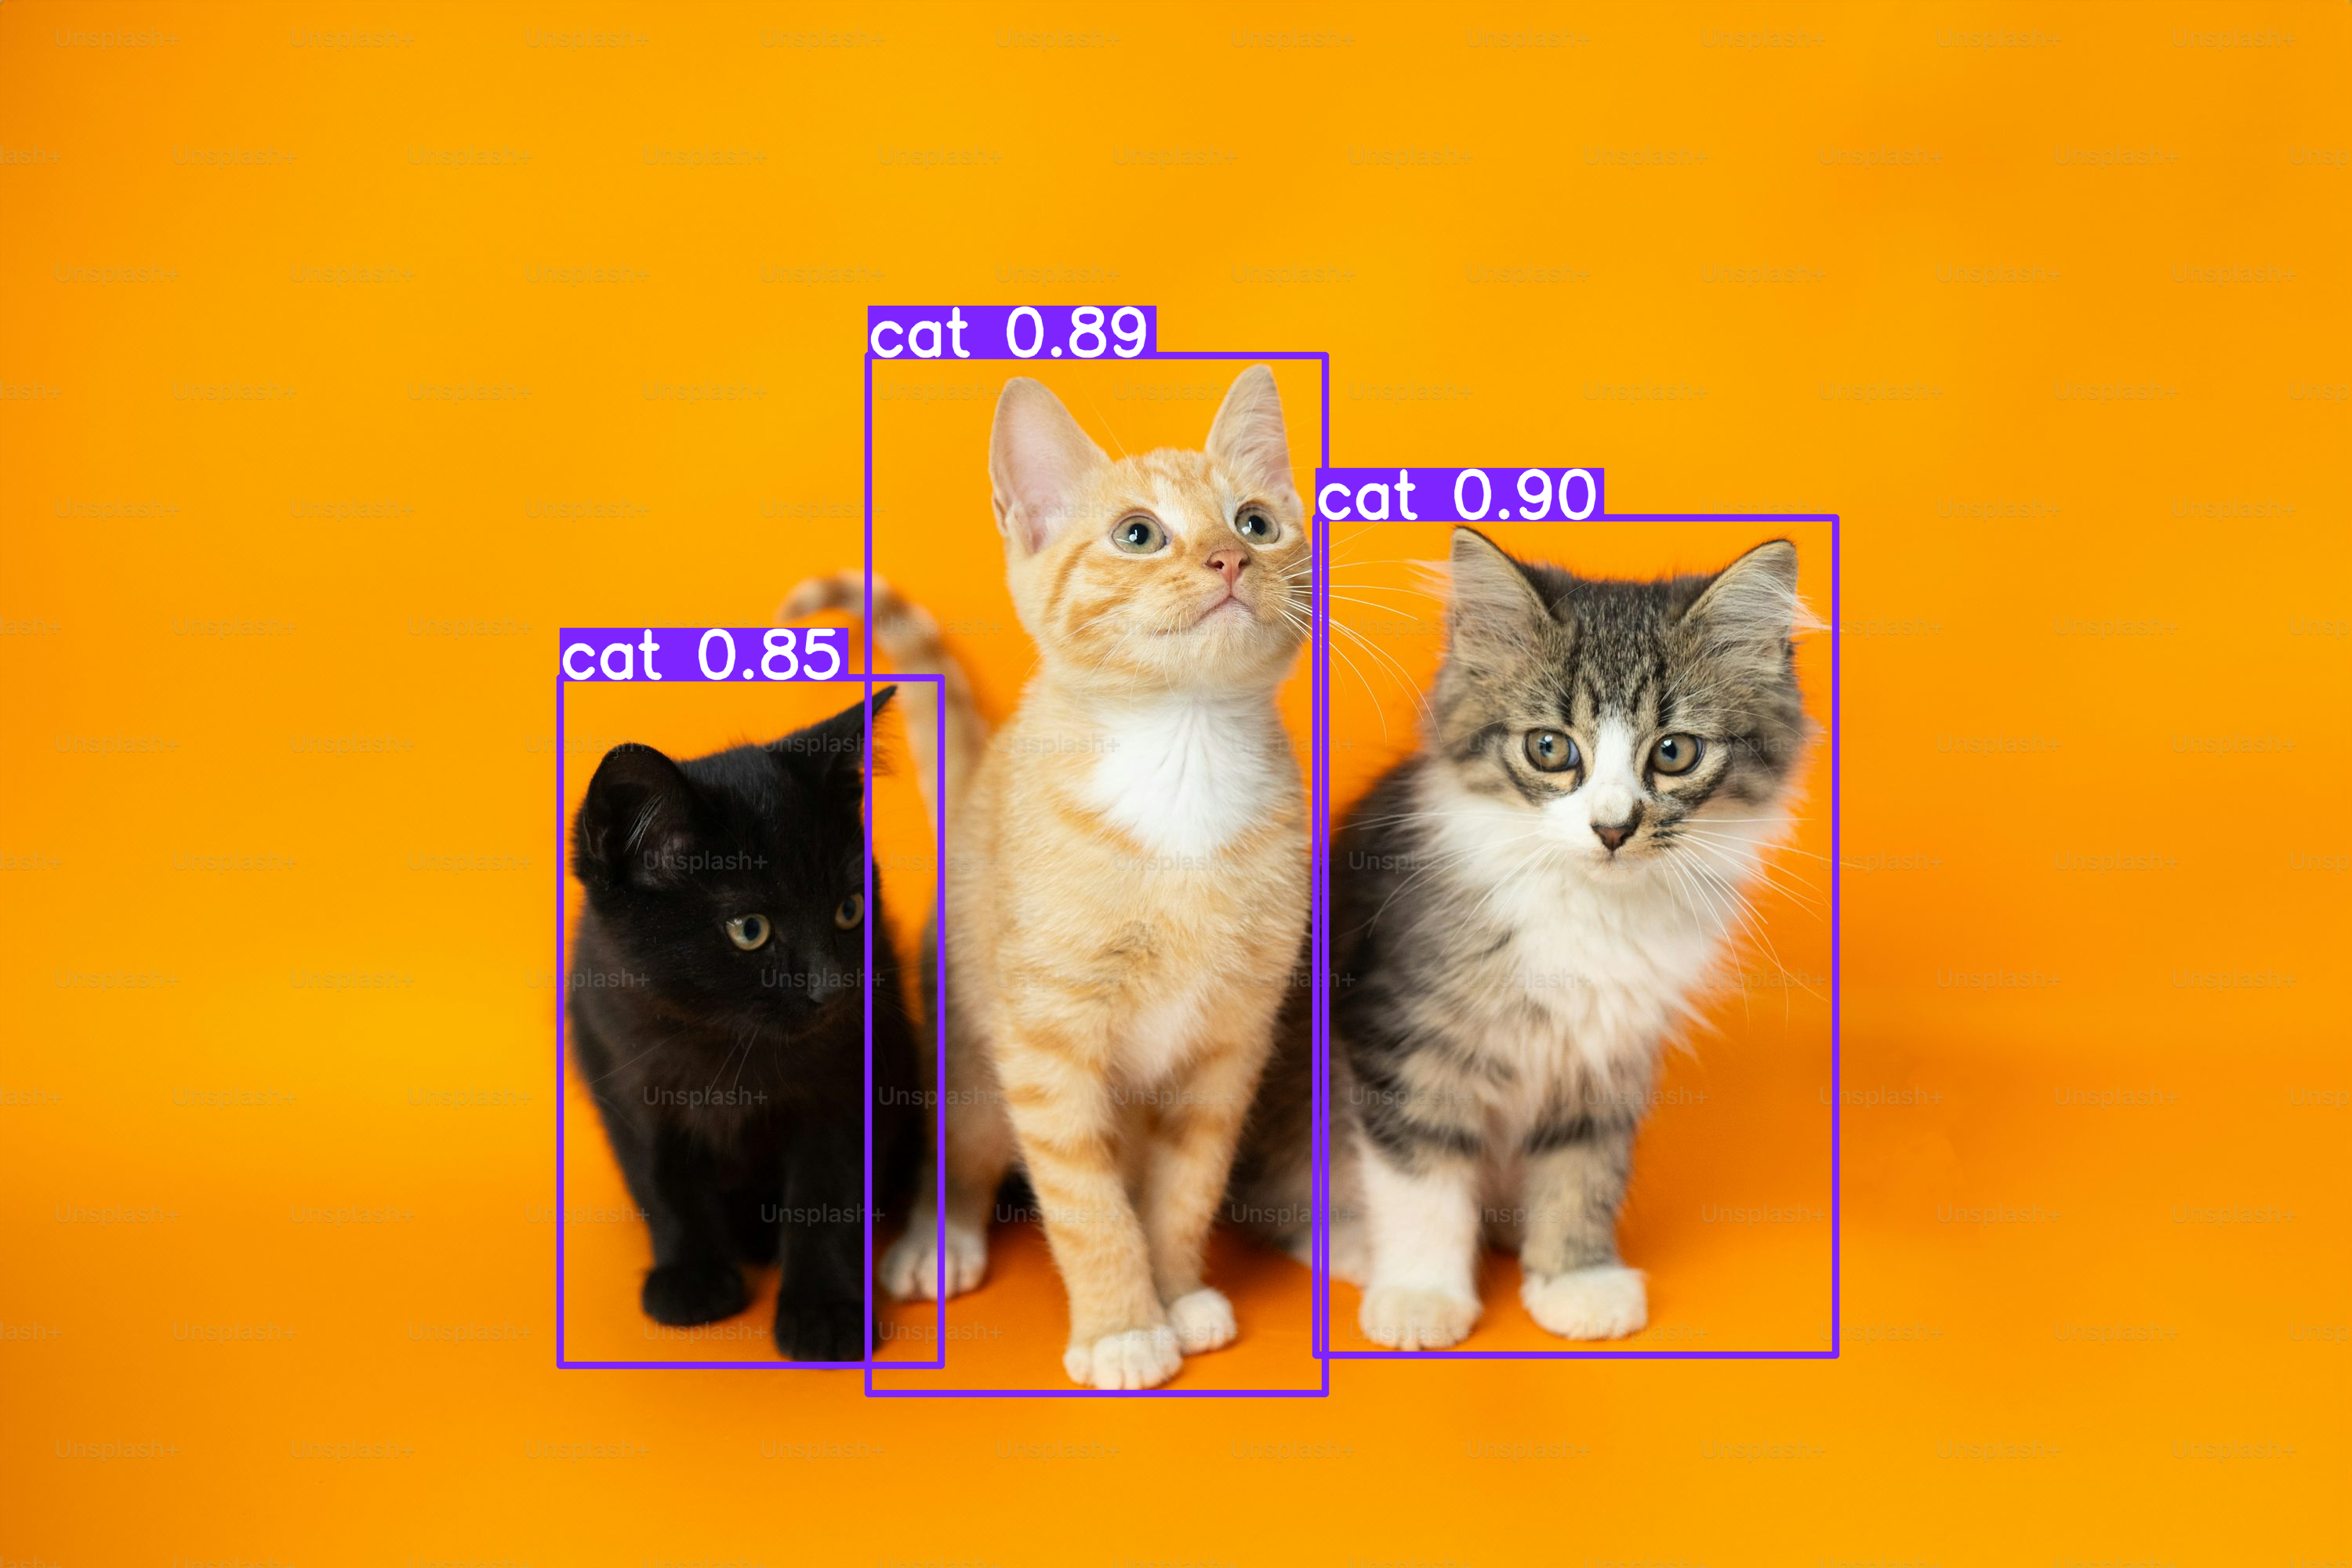

In [4]:
# Read an image
image_path = "sample.jpg"  # Replace with your image path
img = cv2.imread(image_path)

# Run detection
results = model(image_path)  # Returns detections

# Show the results
results[0].show()  # Opens image with bounding boxes


In [ ]:
# Download a sample image
!wget -O sample.jpg https://ultralytics.com/images/zidane.jpg

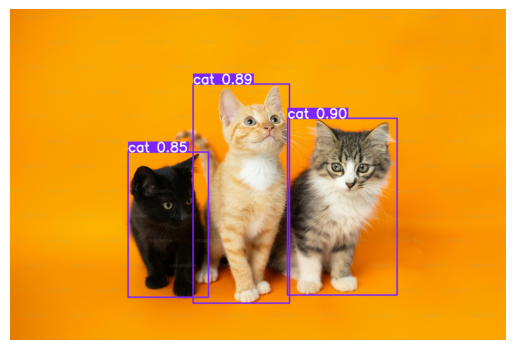

In [5]:
# Save results
results[0].save(filename="output.jpg")

# Display in notebook
output_img = cv2.imread("output.jpg")
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [7]:
import cv2
cap = cv2.VideoCapture(0)
print(cap.isOpened())
cap.release()


False


In [12]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
import cv2
import numpy as np
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Apply mirror effect
            video.style.transform = 'scaleX(-1)';

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            const ctx = canvas.getContext('2d');
            // Flip the captured image horizontally
            ctx.translate(canvas.width, 0);
            ctx.scale(-1, 1);
            ctx.drawImage(video, 0, 0);

            stream.getVideoTracks()[0].stop();
            div.remove();

            const dataUrl = canvas.toDataURL('image/jpeg', quality);
            return dataUrl;
        }
    ''')
    display(js)
    data = eval_js(f'takePhoto({quality})')
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename


In [13]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")  # Pretrained YOLOv8 small model


<IPython.core.display.Javascript object>


image 1/1 /content/webcam.jpg: 480x640 5 persons, 1 backpack, 2 chairs, 2 tvs, 1 laptop, 464.3ms
Speed: 4.5ms preprocess, 464.3ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)


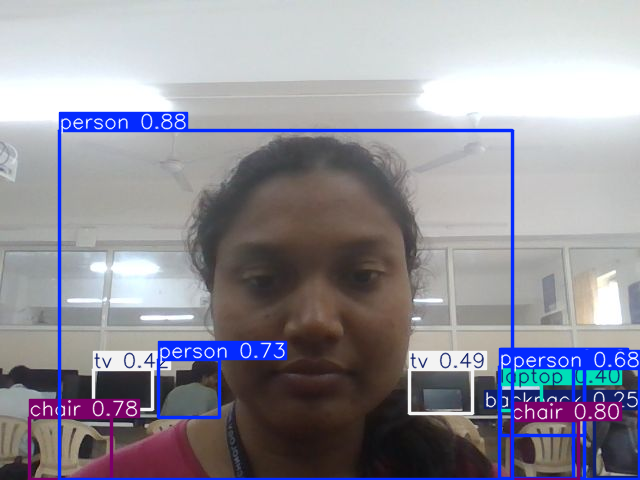

In [17]:
# Capture image from webcam
image_path = take_photo('webcam.jpg')

# Run YOLO detection
results = model(image_path)

# Show the detection results
results[0].show()
